## coco api

In [1]:
from pycocotools.coco import COCO
import random
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coco=COCO('./COCO_data.json')

loading annotations into memory...
Done (t=2.30s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
vehicle pedestrian scooter bicycle

COCO supercategories: 
AIDEA


In [4]:
catIds = coco.getCatIds(catNms=['pedestrian']);
imgIds = coco.getImgIds(catIds=catIds);
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
AnnIds = coco.getAnnIds(imgIds = img['id'])
annot = coco.loadAnns(AnnIds)

print('img:')
display(img) 

print('annotation')
display(annot)

img:


{'file_name': 'All/2_77_01.mp4/2_77_01.mp4_00690.jpg',
 'id': 19270,
 'license': 1,
 'height': 1080,
 'width': 1920,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': '2021-02-21 00:00:00'}

annotation


[{'id': 175304,
  'image_id': 19270,
  'category_id': 2,
  'area': 7367.0,
  'bbox': [276.0, 633.0, 53.0, 139.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175305,
  'image_id': 19270,
  'category_id': 1,
  'area': 5460.0,
  'bbox': [226.0, 654.0, 70.0, 78.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175306,
  'image_id': 19270,
  'category_id': 1,
  'area': 135462.0,
  'bbox': [671.0, 660.0, 422.0, 321.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175307,
  'image_id': 19270,
  'category_id': 1,
  'area': 4864.0,
  'bbox': [326.0, 667.0, 76.0, 64.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175308,
  'image_id': 19270,
  'category_id': 1,
  'area': 14196.0,
  'bbox': [1332.0, 665.0, 169.0, 84.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175309,
  'image_id': 19270,
  'category_id': 1,
  'area': 1517.0,
  'bbox': [1596.0, 641.0, 41.0, 37.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 175310,
  'image_id': 19270,
  'category_id': 1,
  'area': 960.0,
  'bb

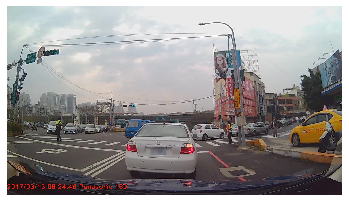

In [5]:
I = io.imread('../ivslab_train/JPEGImages/'+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

## Read COCO Format dataset using pytorch api

In [6]:
import torchvision.datasets as dset
import torchvision.transforms as trns

# create mscoco detection train dataset
det_train = dset.CocoDetection(root='../ivslab_train/JPEGImages/',
                               annFile='./COCO_data.json',
                               transform=trns.ToTensor())

loading annotations into memory...
Done (t=2.09s)
creating index...
index created!


## COCO_eval

In [10]:
import pandas as pd
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [11]:
### load csv and turn it to json file for COCOEVAL
'''
example: 
[{"image_id":42,"category_id":18,"bbox":[258.15,41.29,348.26,243.78],"score":0.236},
{"image_id":73,"category_id":11,"bbox":[61,22.75,504,609.67],"score":0.318},
{"image_id":73,"category_id":4,"bbox":[12.66,3.32,268.6,271.91],"score":0.726}]
'''
df = pd.read_csv('fasterRCNN_10epoch.csv')
df.head()

,image_filename,label_id,x,y,w,h,confidence
0,itp_1.jpg,2,1488.0,544.05,38.4,98.55,0.911576
1,itp_1.jpg,1,38.4,517.05,184.8,176.85,0.999700
2,itp_1.jpg,3,866.4,545.40,64.8,85.05,0.990293
3,itp_1.jpg,2,1528.8,531.90,52.8,140.40,0.906131
4,itp_1.jpg,1,967.2,561.60,72.0,44.55,0.828131


In [23]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

annType = ['segm','bbox','keypoints']
annType = annType[1]      #specify type here
print('Running demo for *%s* results.'%(annType))

annFile = './COCO_data.json' ## ground truth
resFile = './resfile_demo.json' ## prediction

cocoGt=COCO(annFile) 
cocoDt=cocoGt.loadRes(resFile)

imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:4]
imgId = imgIds[np.random.randint(4)]

# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds  = imgIds
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Running demo for *bbox* results.
loading annotations into memory...
Done (t=2.89s)
creating index...
index created!
Loading and preparing results...
DONE (t=2.62s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU